#                                                              CONTENT
1. [UNDERSTANDING CASE AND DATA](#1) <a id=15></a>
2. [DATA VISUALIZATION](#2)
3. [MACHINE LEARNING](#3)
   - 3.1[Support Vector Machine](#4)
   - 3.2[RandomForest](#5)
   - 3.3[GradientBoosting](#6)
   - 3.4[ XGBoosT](#7)
   - 3.4[CATBoosT](#8)
4. [DEEP LEARNING](#9)
   - 4.1[MODEL](#10)
   - 4.1[OVER FITTING](#11)
5. [CLASSIFICATION CONCLUSIONS(MACHINE LEARNING MODELS VS DEEP LEARNING MODEL) ](#12)



# 1.UNDERSTANDING CASE AND DATA <a id=1></a>

- About this dataset
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")



In [3]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

-THERE IS NO MISSING VALUE

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# 2.DATA VISUALIZATION <a id=2></a>

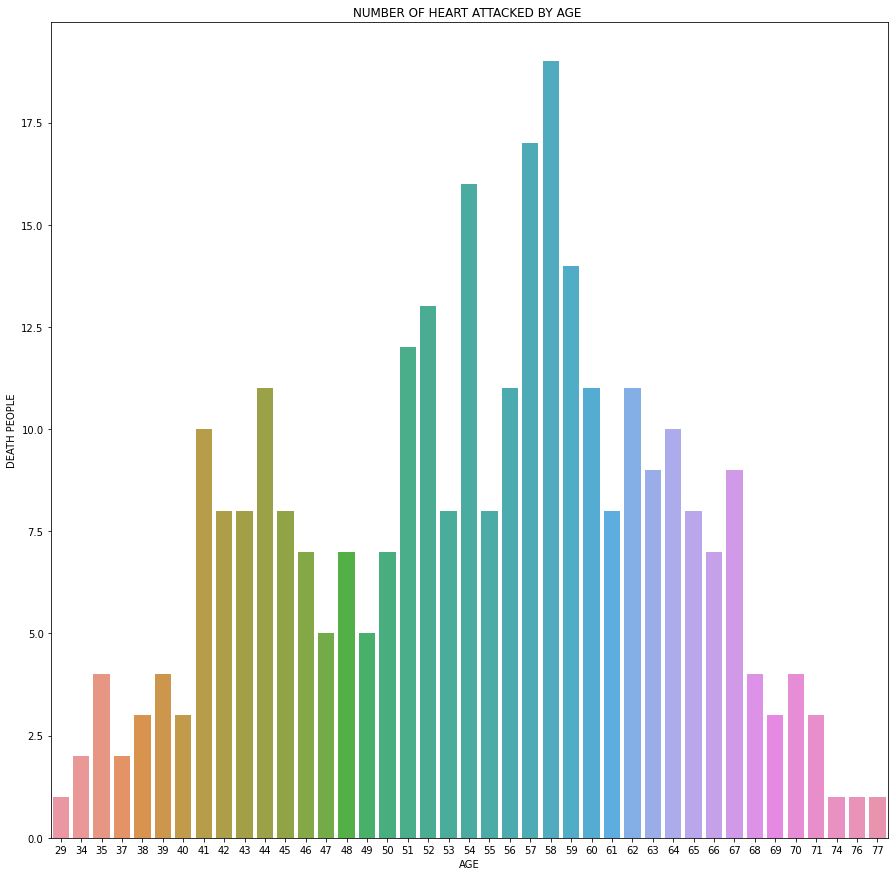

In [8]:
data["number"]=np.ones(len(data)).astype("int64",copy=True) #I ADDED A COLUMN WHICH CONSIST OF ONES 
data1=data.groupby(["age"]).sum().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=data1.age,y=data1.number,data=data1)
plt.xlabel("AGE")
plt.ylabel("DEATH PEOPLE")
plt.title("NUMBER OF HEART ATTACKED BY AGE ")
plt.show()

-THIS TABLE SHOW US HEART ATTACK BY AGE, WE CAN SEE BETWEEN 50 AND 60 AGE OF PEOPLE HAD HEART ATTACKS MORE

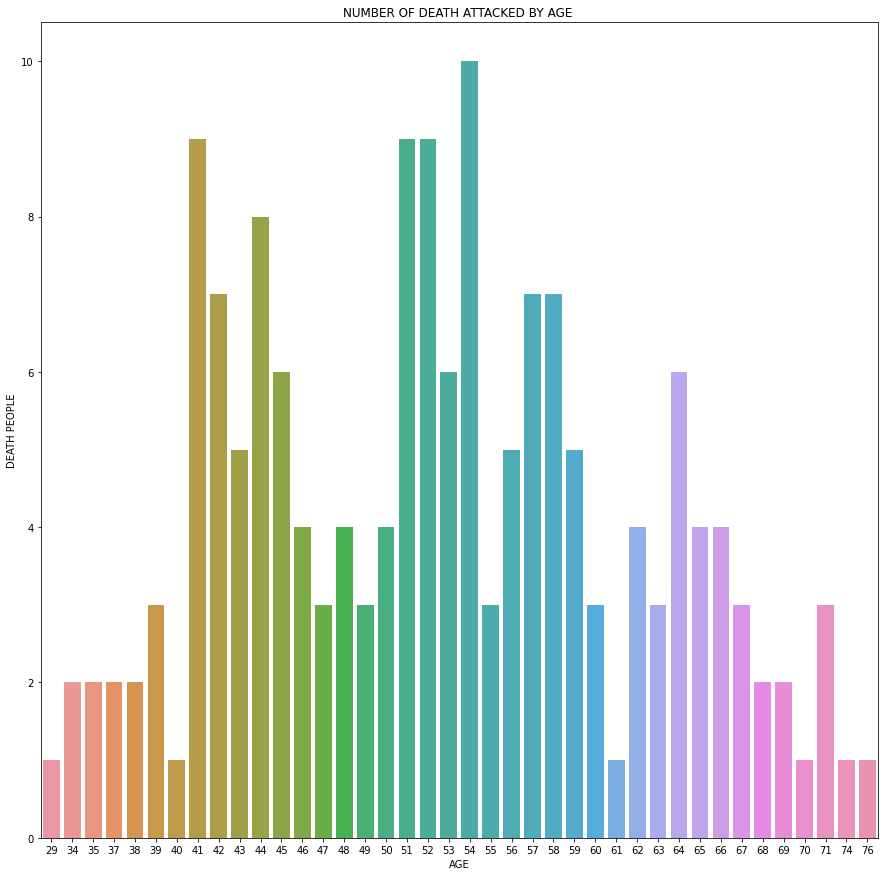

In [9]:
data1=data[data["output"]==1].groupby(["age"]).sum().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=data1.age,y=data1.number,data=data1)
plt.xlabel("AGE")
plt.ylabel("DEATH PEOPLE")
plt.title("NUMBER OF DEATH ATTACKED BY AGE ")
plt.show()


-WE CAN SEE AGAIN BETWEEN 50 AND 60 AGE OF PEOPLE DIED DUE TO HEART ATTACK.

In [10]:
data1=data[data["output"]==0].groupby(["sex"]).sum().reset_index()[["sex","number"]]
data2=data[data["output"]==1].groupby(["sex"]).sum().reset_index()[["sex","number"]]

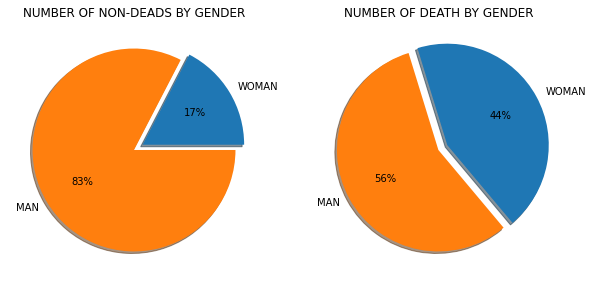

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.pie(data1["number"],autopct = '%0.0f%%',labels=("WOMAN","MAN"), shadow=True,explode=[0.1,0])
plt.title("NUMBER OF NON-DEADS BY GENDER")
plt.subplot(1, 2, 2)
plt.pie(data2["number"],autopct = '%0.0f%%',labels=("WOMAN","MAN"), shadow=True,explode=[0.1,0],startangle=-50)
plt.title("NUMBER OF DEATH BY GENDER")
plt.show()


-THE PEOPLE WHO HAVE BOTH HEART ATTACK AND DIE OF HEART ATTACK ARE MOSTLY MEN.

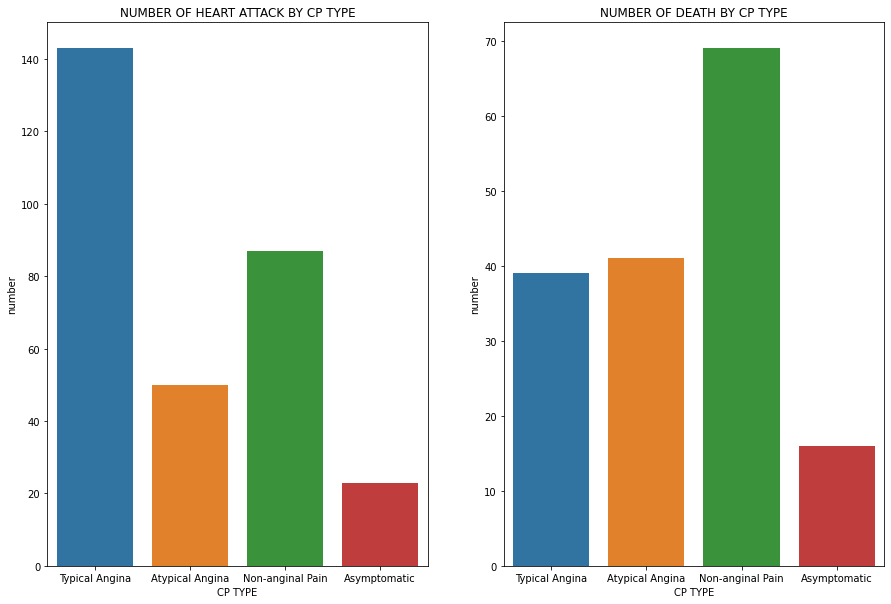

In [12]:
data4=data.groupby(["cp"]).sum().reset_index()[["cp","number"]]
data5=data[data["output"]==1].groupby(["cp"]).sum().reset_index()[["cp","number"]]
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x=["Typical Angina","Atypical Angina","Non-anginal Pain","Asymptomatic"],y=data4.number,data=data4)
plt.xlabel("CP TYPE")
plt.title("NUMBER OF HEART ATTACK BY CP TYPE")
plt.subplot(1,2,2)
sns.barplot(x=["Typical Angina","Atypical Angina","Non-anginal Pain","Asymptomatic"],y=data5.number,data=data5)
plt.xlabel("CP TYPE")
plt.title("NUMBER OF DEATH BY CP TYPE")
plt.show()


-THOSE GRAPHICS SHOW US WHICH CHEST PAIN TYPE PEOPLE HEART ATTACK OR DIED

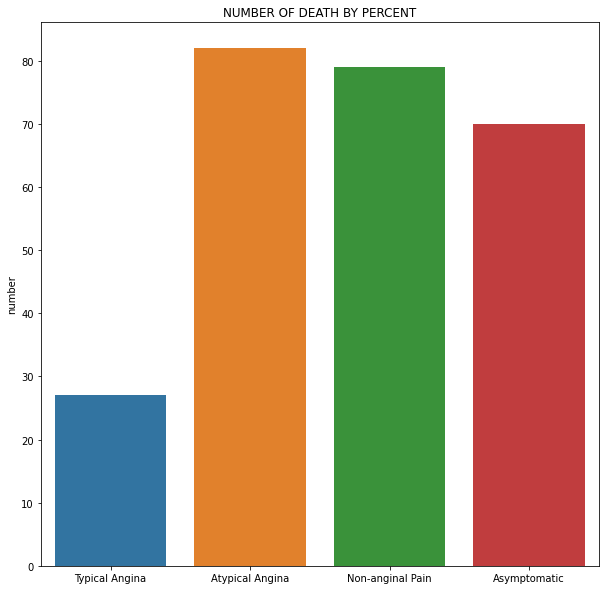

In [13]:
data6=round(data5.number/data4.number*100,0)
data6=data6.reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x=["Typical Angina","Atypical Angina","Non-anginal Pain","Asymptomatic"],y=data6["number"])
plt.title("NUMBER OF DEATH BY PERCENT")
plt.show()


-ATYPICAL ANGINA WHICH IS CHEST PAIN TYPE IS MORE SERIOUSLY THAN OTHERS.

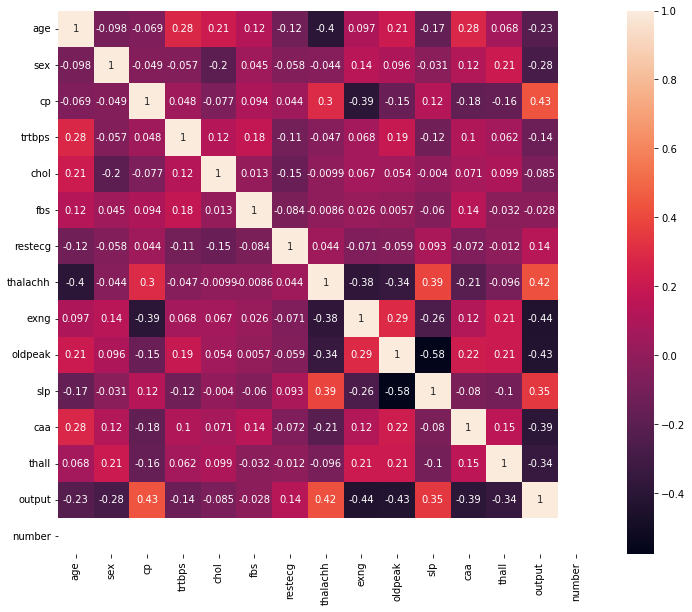

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

-THIS CORRELATION MATRIX SHOWS THAT HEART ATTACK DEPENDS ON cp(CHEST PAIN),thalachh(MAXIMUM HEART RATE ACHIEVED),slp(Slope)

# 3.MACHINE LEARNING <a id=3></a>

In [15]:
from sklearn.model_selection import train_test_split 
x=data.iloc[:,0:-2]
y=data.iloc[:,-2]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [16]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# 3.1 Support Vector Machine <a id=4></a>

In [18]:
from sklearn.svm import SVC
svc=SVC(C=1,gamma=0.05,kernel="rbf",random_state=42)
svc.fit(x_train,y_train)
print("Accuracy score before the GridSearch method",accuracy_score(y_test,svc.predict(x_test)))
SVC=SVC()
parameters = {"kernel":('rbf','linear'),"C":np.arange(1,5,1),'gamma':[0.00001,0.005,0.01,0.05,0.1,0.5]}
GSCV=GridSearchCV(SVC,parameters)
GSCV.fit(x_train,y_train)
y_pred = GSCV.predict(x_test)
print("Accuracy score after the GridSearch method",accuracy_score(y_test,y_pred))
SVC_SCORE=(accuracy_score(y_test,y_pred))
print("best parameters",GSCV.best_params_)


 

Accuracy score before the GridSearch method 0.8552631578947368
Accuracy score after the GridSearch method 0.8552631578947368
best parameters {'C': 3, 'gamma': 0.01, 'kernel': 'rbf'}


# 3.2 RandomForest <a id=5></a>

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
print("Accuracy score before the GridSearch method",accuracy_score(y_test,RFC.predict(x_test)))

rfc=RandomForestClassifier(random_state=42)
parameters = {"criterion":["entropy","gini"],"n_estimators":np.arange(1,50,1)}
GSCV=GridSearchCV(rfc,parameters)
GSCV.fit(x_train,y_train)
y_pred=GSCV.predict(x_test)
print("Accuracy score after the GridSearch method",accuracy_score(y_test,y_pred))
RandomForest_SCORE=(accuracy_score(y_test,y_pred))
print("best parameters",GSCV.best_params_)


 

Accuracy score before the GridSearch method 0.8157894736842105
Accuracy score after the GridSearch method 0.8421052631578947
best parameters {'criterion': 'gini', 'n_estimators': 14}


# 3.3 GradientBoosting <a id=6></a>

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=42)
GBC.fit(x_train,y_train)
print("Accuracy score before the GridSearch method",accuracy_score(y_test,GBC.predict(x_test)))

rfc=GradientBoostingClassifier(random_state=42)
parameters = {"criterion":["squared_error","mse"],"n_estimators":np.arange(1,50,1)}
GSCV=GridSearchCV(rfc,parameters)
GSCV.fit(x_train,y_train)
y_pred=GSCV.predict(x_test)
print("Accuracy score after the GridSearch method",accuracy_score(y_test,y_pred))
GradientBoosting_SCORE=(accuracy_score(y_test,y_pred))
print("best parameters",GSCV.best_params_)

Accuracy score before the GridSearch method 0.7763157894736842
Accuracy score after the GridSearch method 0.8421052631578947
best parameters {'criterion': 'squared_error', 'n_estimators': 39}


# 3.4 XGBoosT <a id=7></a> 

In [21]:
from xgboost import XGBClassifier
XGB=XGBClassifier(random_state=42)
XGB.fit(x_train,y_train)
y_pred=XGB.predict(x_test)
print("Accuracy score",accuracy_score(y_test,y_pred))
XGBClassifier_SCORE=(accuracy_score(y_test,y_pred))


Accuracy score 0.8289473684210527


# 3.5 CATBoosT <a id=8></a> 

In [22]:
from catboost import CatBoostClassifier
CB=XGBClassifier(random_state=42)
CB.fit(x_train,y_train)
y_pred=CB.predict(x_test)
print("Accuracy score",accuracy_score(y_test,y_pred))
CatBoost_SCORE=(accuracy_score(y_test,y_pred))


Accuracy score 0.8289473684210527


# 4.DEEP LEARNING <a id=9></a>

# 4.1 MODEL <a id=10></a>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()
model.add(Dense(13,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy']) 
#WE USED sigmoid and binary_crossentropy BECAUSE OF OUR OUTPUT CONSISTED OF 0-1


2022-05-18 14:21:33.806986: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=100,verbose=0)

2022-05-18 14:21:34.065291: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [26]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5).astype(int)
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_pred,y_test),"ysdaaadddddd")
print("Classification on Depp Learning Accuracy score",accuracy_score(y_test,y_pred))
Deep_Learning_Score=accuracy_score(y_test,y_pred)




[[27  5]
 [ 8 36]] ysdaaadddddd
Classification on Depp Learning Accuracy score 0.8289473684210527


# 4.2 OVER FITTING PROBLEM <a id=11></a>

### Is there overfitting on our deep learning model?

<AxesSubplot:>

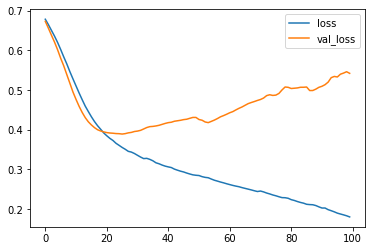

In [27]:
graf=pd.DataFrame(history.history)
graf=graf.drop(["val_accuracy","accuracy"],axis=1)
graf.plot()



-THIS CURVE OF VALUE LOSS SHOWS THAT THIS MODEL IS UNBALANCED.SO WE CAN SAY THIS MODEL HAS OVER FITTING SO WE HAVE TO FIX THIS PROBLEM WITH EARLY STOPPING METHOD

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

-WE USED EARLY STOPPING METHOD IN ORDER TO MAKE MINIMUM val_loss 

In [29]:
model=Sequential()
model.add(Dense(13,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [30]:
history1=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=100,verbose=1,callbacks=[earlystopping])

Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 0.6818 - accuracy: 0.5639 - val_loss: 0.6855 - val_accuracy: 0.6184
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6693 - accuracy: 0.6035 - val_loss: 0.6769 - val_accuracy: 0.6316
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6585 - accuracy: 0.5947 - val_loss: 0.6656 - val_accuracy: 0.6316
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.6167 - val_loss: 0.6538 - val_accuracy: 0.6974
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6332 - accuracy: 0.6123 - val_loss: 0.6411 - val_accuracy: 0.6974
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6190 - accuracy: 0.6344 - val_loss: 0.6277 - val_accuracy: 0.6974
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6035 - accuracy: 0.6608 - val_loss: 0.6109 - val_accuracy: 0.7237
Epoch 8/100
8/8 [========

In [31]:
epoch=len(history1.epoch)

-FOR OUR FIT VALUE OF EPOCH IS NOT 100 SO WE WILL START OUR MODEL AGAIN WITH NEW EPOCH

In [32]:
model=Sequential()
model.add(Dense(13,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [33]:
history2=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=epoch,verbose=0)
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5).astype(int)
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_pred,y_test),"ysdaaadddddd")
print("Classification on Depp Learning Accuracy score",accuracy_score(y_test,y_pred))
Deep_Learning_Score=accuracy_score(y_test,y_pred)


[[29  5]
 [ 6 36]] ysdaaadddddd
Classification on Depp Learning Accuracy score 0.8552631578947368


<AxesSubplot:>

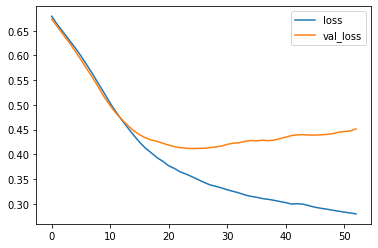

In [34]:
graf2=pd.DataFrame(history2.history)
graf2=graf2.drop(["val_accuracy","accuracy"],axis=1)
graf2.plot()

-OUR NEW OUTPUT IS MORE BALANCED THAN OUR OLD OUTPUT.

# 5.CLASSIFICATION CONCLUSIONS(MACHINE LEARNING MODELS VS DEEP LEARNING MODEL)  <a id=12></a>

In [35]:
df = pd.DataFrame(data =(SVC_SCORE,RandomForest_SCORE,GradientBoosting_SCORE,XGBClassifier_SCORE,CatBoost_SCORE,Deep_Learning_Score),index = ['Support Vector Machine','Random Forest','Gradient Boosting','XGBoost','CatBoost',"Deep Learning"], columns = ['Score'])
df

,Score
Support Vector Machine,0.855263
Random Forest,0.842105
Gradient Boosting,0.842105
XGBoost,0.828947
CatBoost,0.828947
Deep Learning,0.855263


-WE CAN SAY AS CONCLUSION THAT  WE CAN USE FOR THIS DATA CSV MACHINE LEARNING METHOD OR DEEP LEARNING